In [1]:
from service_loader import sys_append_abs, Path
sys_append_abs()
from detection.services.service import get_image, visualize_bbox, convertFromJson, convertToXYmax

In [2]:
import os
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
ROOT = Path('__file__').resolve().parents[2]

In [4]:
content_path = glob.glob(os.path.join(ROOT, 'data/content/*'))
content_path

['/root/workspace/work/Digital-Tashkent/Signs/data/content/23.06.2022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/6 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/27062022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/3',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/19.07.2022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/30062022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/15082022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/7 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/05.07-22.08',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/5 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/13082022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/1',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/2',
 '/root/w

In [5]:
list_train = glob.glob(os.path.join(ROOT, 'data/content/*/*.csv'))
list_train

['/root/workspace/work/Digital-Tashkent/Signs/data/content/23.06.2022/23.06.2022 tr_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/6 Otabek 06.21/Example_Project_Attributes_included_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/27062022/27062022_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full/28062022 from 00010F_4 .csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full/28062022 to 00010F_4.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/3/khakimov- sign project 3_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/19.07.2022/19_07_22_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/30062022/30.06.22 (113415, 115029, 123930)_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/15082022/15.08.2022 full_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/7 Otabek 06.21/Example_Project_Attributes_

In [ ]:
# def splitter(item):
#     return item.split(':')[-1].split('}')[0]
# df = pd.read_csv(list_train[-1])
# df.reset_index(inplace=True)
# df.drop(['level_1', 'level_2', 'level_3', 'level_4', 'filename'], inplace=True, axis=1)
# df.columns = ['filename', 'x', 'y', 'width', 'height', 'Name', 'Type']
# for col in df.columns:
#     df[col] = df[col].apply(splitter)
# data = convertToXYmax(data)
# df.to_csv(list_train[-1])

In [82]:
def get_crop(img, bbox):
    return img[bbox[1]:bbox[3], bbox[0]:bbox[2]]

def wrapper(pth):
    def root2path(item):
        return os.path.join(pth, item)
    return root2path

def joiner(csv_item):
    data = pd.read_csv(csv_item)
    pth = '/'.join(csv_item.split('/')[:-1])
    if 'xmin' not in data.columns:
        data = convertFromJson(data)
        data = convertToXYmax(data)
    data['image'] = data['image'].apply(wrapper(pth))
    return data

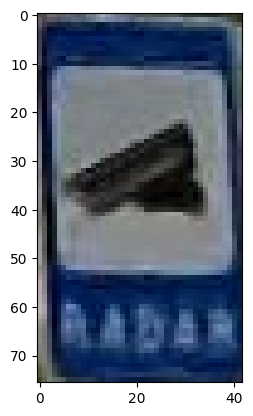

In [83]:
# 18 trash file
index = 18
data = joiner(list_train[index])
im, bbox = get_image(data, index)
bbox = list(map(int, bbox))
plt.imshow(get_crop(im, bbox))